In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('Churn.csv')

# Initial inspection
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (7043, 21)

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [3]:
print("\nData types and missing values:")
display(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessB

None

In [4]:
print("\nDescriptive statistics:")
display(df.describe(include='all').T)


Descriptive statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.000,NaN,NaN,NaN,0.162,0.369,0.000,0.000,0.000,0.000,1.000
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.000,NaN,NaN,NaN,32.371,24.559,0.000,9.000,29.000,55.000,72.000
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Raw Class Distribution (%):
Churn
No    73.463
Yes   26.537
Name: proportion, dtype: float64


C:\Users\Ahmed Ismail\AppData\Local\Temp\ipykernel_14152\1761846768.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette=['#1f77b4', '#ff7f0e'])


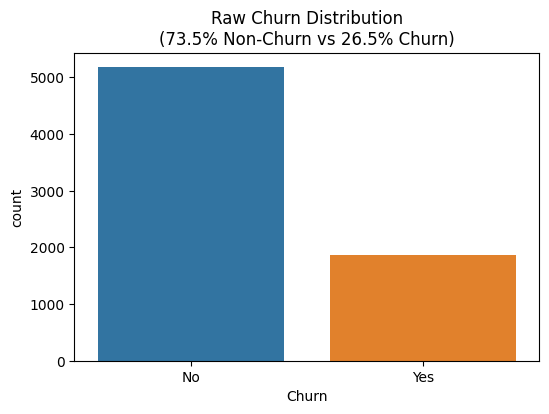

In [5]:
churn_dist_raw = df['Churn'].value_counts(normalize=True) * 100
print("Raw Class Distribution (%):")
print(churn_dist_raw)

# 2. Visualize
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette=['#1f77b4', '#ff7f0e'])
plt.title(f"Raw Churn Distribution\n({churn_dist_raw['No']:.1f}% Non-Churn vs {churn_dist_raw['Yes']:.1f}% Churn)")
plt.show()



In [6]:
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values per column:
customerID: 7043 unique values
gender: 2 unique values
SeniorCitizen: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
tenure: 73 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
MonthlyCharges: 1585 unique values
TotalCharges: 6531 unique values
Churn: 2 unique values


In [7]:
# Target variable distribution
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{'type':'pie'}, {'type':'bar'}]],
                    subplot_titles=['Proportion', 'Count by Gender'])

# Pie chart
fig.add_trace(go.Pie(labels=df['Churn'].value_counts().index, 
                     values=df['Churn'].value_counts().values,
                     name="Churn Proportion"), 
              row=1, col=1)

# Bar chart by gender
churn_by_gender = df.groupby(['gender', 'Churn']).size().unstack()
fig.add_trace(go.Bar(x=churn_by_gender.index,
                     y=churn_by_gender.iloc[:, 0],
                     name='Not Churned',
                     marker_color='lightblue'),
              row=1, col=2)
fig.add_trace(go.Bar(x=churn_by_gender.index,
                     y=churn_by_gender.iloc[:, 1],
                     name='Churned',
                     marker_color='salmon'),
              row=1, col=2)

fig.update_layout(title='Churn Distribution Analysis', 
                  height=500, width=1000,
                  showlegend=True)
fig.show()

In [8]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact
from scipy.stats import chi2_contingency
from IPython.display import display

def analyze_categorical_features(df):
    # Get categorical columns (excluding target if it's categorical)
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if 'Churn' in cat_cols:
        cat_cols.remove('Churn')
    
    # Print available features
    print("Available categorical features:")
    for col in cat_cols:
        print(f"- {col} ({df[col].nunique()} unique values)")
    
    @interact
    def plot_categorical(feature=cat_cols):
        # Create more explicit labels
        temp_df = df.copy()
        feature_label = feature.replace('Service', ' Service Status') if 'Service' in feature else feature
        x_label = f'Has {feature}' if feature == 'PhoneService' else feature
        
        # Create plot
        fig = px.histogram(temp_df, 
                          x=feature,
                          color='Churn',
                          barmode='group',
                          title=f'Churn Distribution by {feature_label}',
                          labels={feature: feature_label, 'Churn': 'Churn Status'},
                          width=800, 
                          height=500,
                          text_auto=True,
                          category_orders={feature: sorted(df[feature].unique()),
                                         'Churn': ['No', 'Yes']},
                          color_discrete_map={'No': '#1f77b4', 'Yes': '#ff7f0e'})
        
        # Update layout
        fig.update_layout(
            xaxis_title=feature_label,
            yaxis_title="Number of Customers",
            legend_title="Churn Status",
            hovermode="x unified"
        )
        
        # Add percentage annotations
        fig.update_traces(texttemplate='%{y}', textposition='outside')
        
        # Show plot
        fig.show()
        
        # Statistical analysis
        print("\nStatistical Analysis:")
        contingency_table = pd.crosstab(df[feature], df['Churn'])
        
        if contingency_table.size > 0:
            # Calculate percentages
            percentage_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
            
            print("\nCounts:")
            display(contingency_table)
            
            print("\nPercentages (%):")
            display(percentage_table.round(1))
            
            # Chi-square test
            if contingency_table.sum().sum() > 0:
                chi2, p_val, dof, expected = chi2_contingency(contingency_table)
                print(f"\nChi-square test:")
                print(f"χ² = {chi2:.2f}, p-value = {p_val:.4f}")
                print("Significant association (p < 0.05)" if p_val < 0.05 
                      else "No significant association")
            else:
                print("\nCannot perform chi-square test - no observations")
        else:
            print("\nNo data available for this feature")

# Usage example:
analyze_categorical_features(df)


Available categorical features:
- customerID (7043 unique values)
- gender (2 unique values)
- Partner (2 unique values)
- Dependents (2 unique values)
- PhoneService (2 unique values)
- MultipleLines (3 unique values)
- InternetService (3 unique values)
- OnlineSecurity (3 unique values)
- OnlineBackup (3 unique values)
- DeviceProtection (3 unique values)
- TechSupport (3 unique values)
- StreamingTV (3 unique values)
- StreamingMovies (3 unique values)
- Contract (3 unique values)
- PaperlessBilling (2 unique values)
- PaymentMethod (4 unique values)
- TotalCharges (6531 unique values)


interactive(children=(Dropdown(description='feature', options=('customerID', 'gender', 'Partner', 'Dependents'…

In [9]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact
from scipy.stats import ttest_ind

# Cache numerical columns to avoid repeated computation
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

@interact
def plot_numerical(column=num_cols):
    # Create efficient figure with subset of data
    fig = px.box(df, x='Churn', y=column, color='Churn',
                 title=f'Distribution of {column} by Churn Status',
                 width=800, height=500)
    
    group1 = df.loc[df['Churn'] == 'No', column].dropna()
    group2 = df.loc[df['Churn'] == 'Yes', column].dropna()
    
    fig.show()
    
    if len(group1) > 1 and len(group2) > 1: 
        t_stat, p_val = ttest_ind(group1, group2)
        print(f"\nT-test results for {column}:")
        print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
        print("Significant difference (p < 0.05)" if p_val < 0.05 
              else "No significant difference")
    else:
        print("\nNot enough samples for statistical test")

interactive(children=(Dropdown(description='column', options=('SeniorCitizen', 'tenure', 'MonthlyCharges'), va…

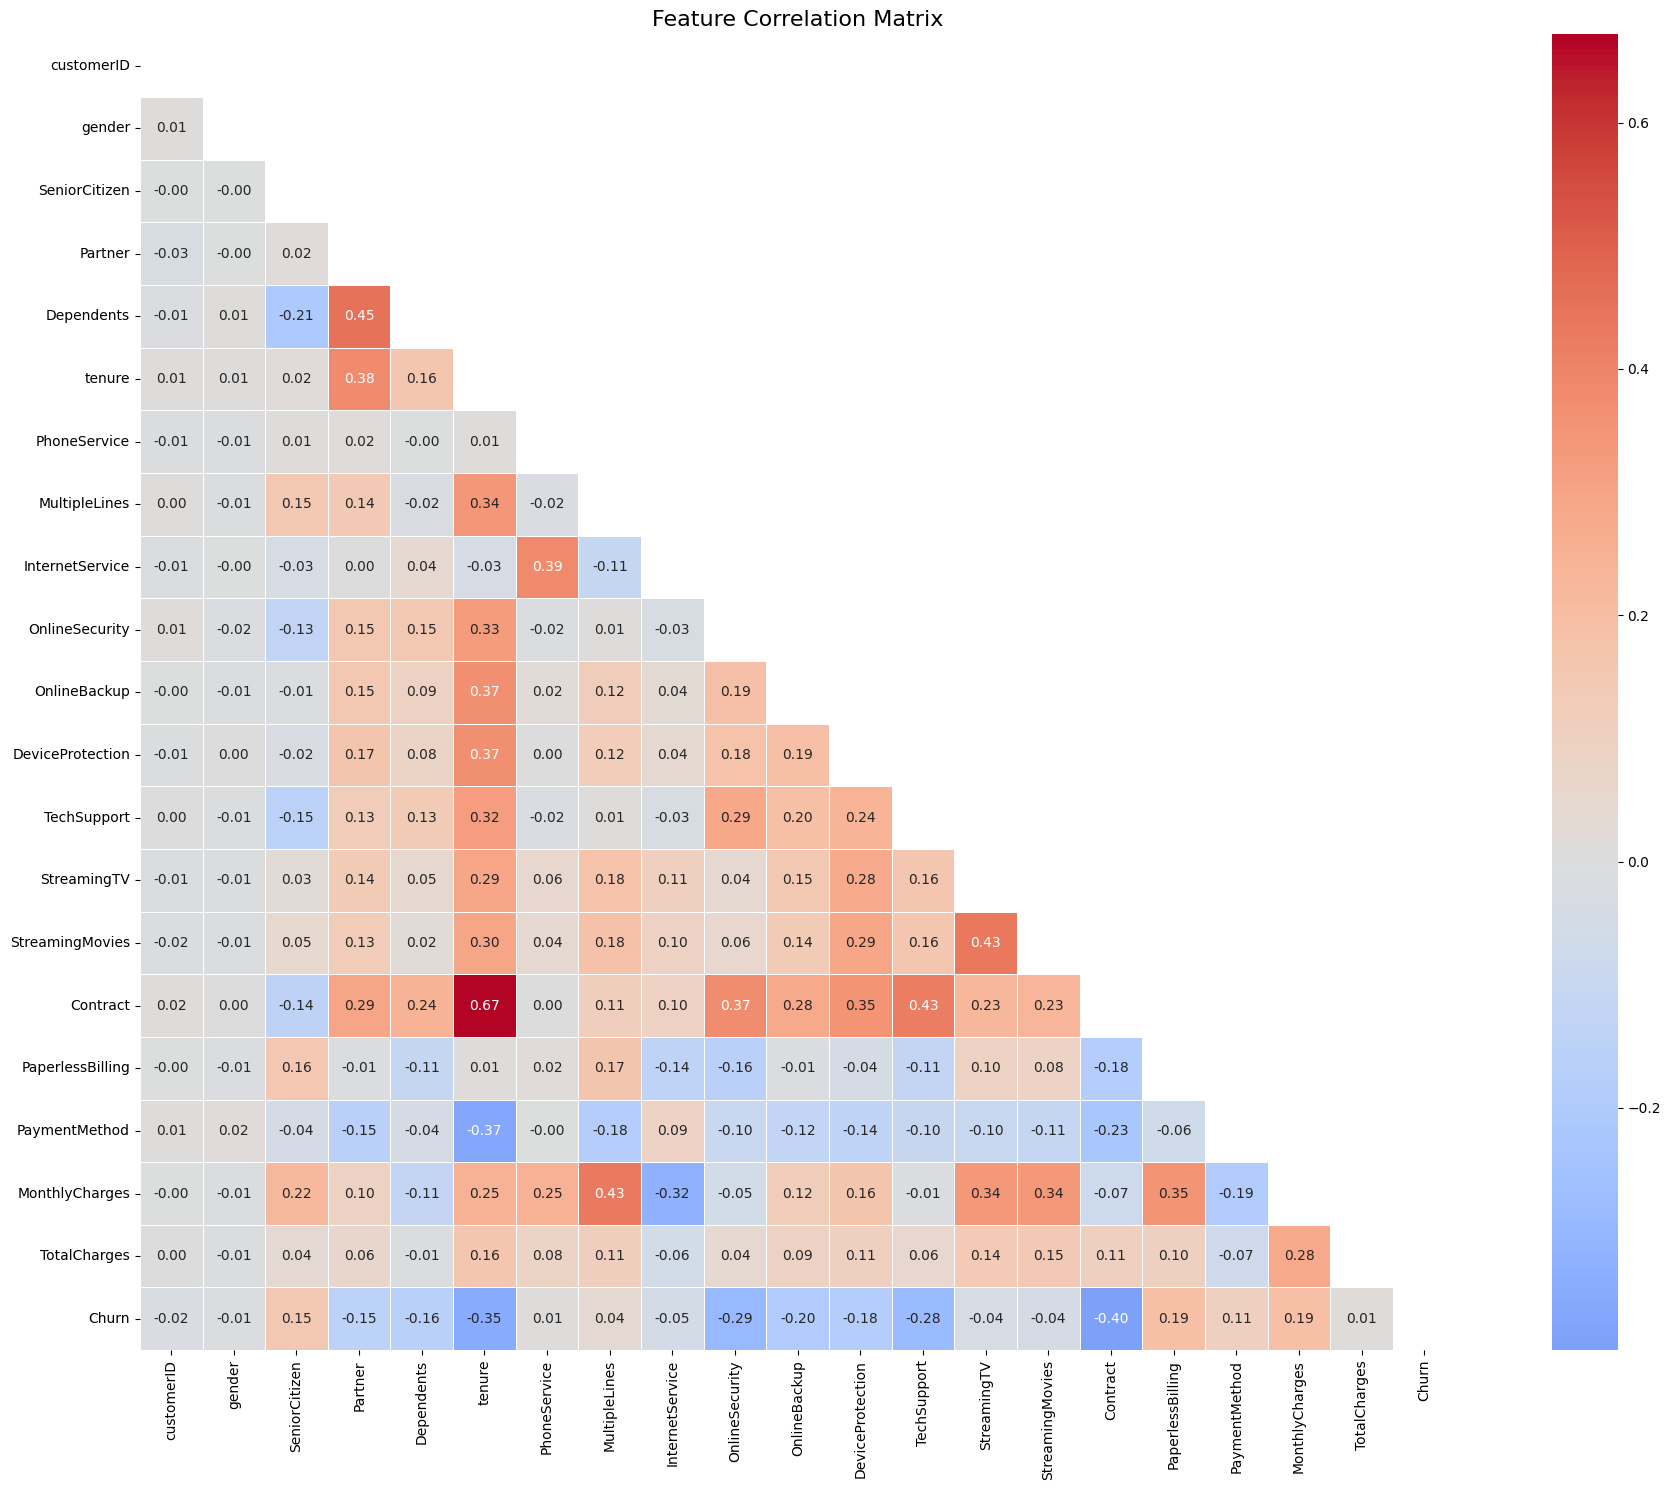


Top features correlated with Churn:
MonthlyCharges      0.193
PaperlessBilling    0.192
SeniorCitizen       0.151
PaymentMethod       0.107
MultipleLines       0.038
TotalCharges        0.014
PhoneService        0.012
gender             -0.009
customerID         -0.017
StreamingTV        -0.037
Name: Churn, dtype: float64

Top negative correlations with Churn:
Contract           -0.397
tenure             -0.352
OnlineSecurity     -0.289
TechSupport        -0.282
OnlineBackup       -0.196
DeviceProtection   -0.178
Dependents         -0.164
Partner            -0.150
InternetService    -0.047
StreamingMovies    -0.038
Name: Churn, dtype: float64
Top 10 features for churn prediction: ['Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'MonthlyCharges', 'PaperlessBilling', 'DeviceProtection', 'Dependents', 'SeniorCitizen']


In [10]:
df_corr = df.copy()

le = LabelEncoder()
for col in df_corr.select_dtypes(include=['object']).columns:
    df_corr[col] = le.fit_transform(df_corr[col])

plt.figure(figsize=(20, 15))
corr = df_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, square=True, linewidths=.5)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

print("\nTop features correlated with Churn:")
print(corr['Churn'].sort_values(ascending=False)[1:11])
print("\nTop negative correlations with Churn:")
print(corr['Churn'].sort_values()[0:10])
top_features = corr['Churn'].abs().sort_values(ascending=False)[1:11].index.tolist()
print("Top 10 features for churn prediction:", top_features)

 Available numerical columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges']

 Plotting distributions for: ['tenure', 'MonthlyCharges', 'TotalCharges']


<Figure size 1500x1000 with 0 Axes>

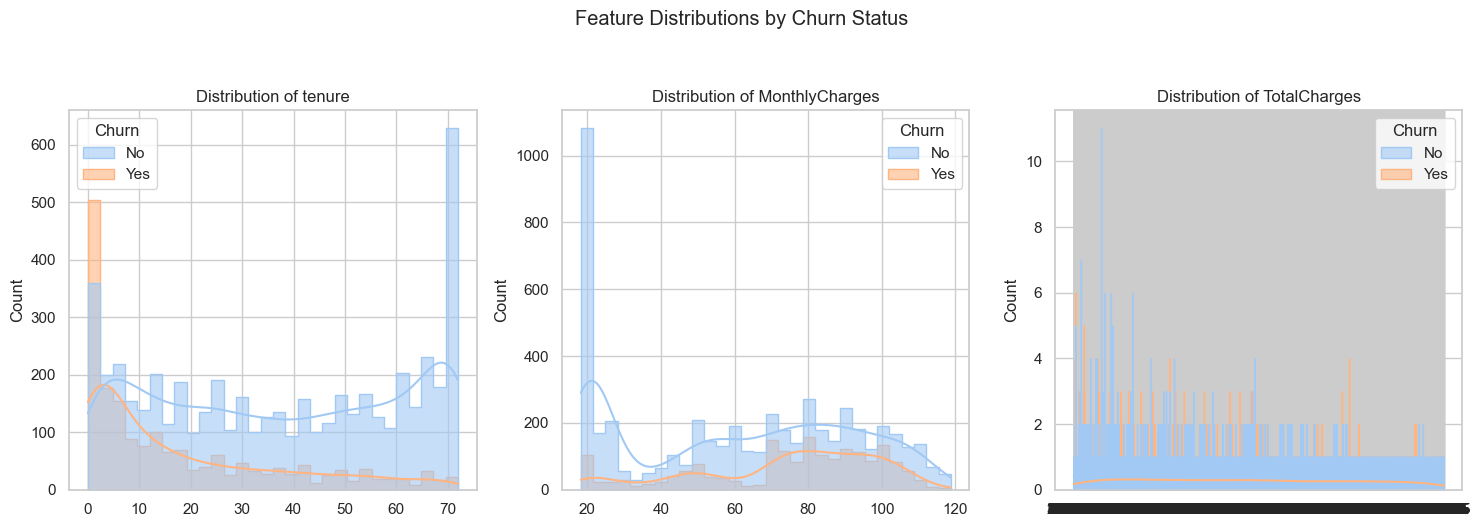

In [11]:
# Set style
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(15, 10))

# 1. Verify Available Columns First
print(" Available numerical columns:")
print(df.select_dtypes(include=['int64','float64']).columns.tolist())

# 2. Dynamic Histograms (Using Existing Columns)
existing_num_cols = [col for col in ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServices'] 
                    if col in df.columns]

print("\n Plotting distributions for:", existing_num_cols)

# Create subplots
fig, axes = plt.subplots(1, len(existing_num_cols), figsize=(15, 5))
fig.suptitle('Feature Distributions by Churn Status', y=1.05)

for i, feature in enumerate(existing_num_cols):
    if len(existing_num_cols) > 1:
        ax = axes[i]
    else:
        ax = axes
    sns.histplot(data=df, x=feature, hue='Churn', bins=30, kde=True, 
                 element='step', ax=ax, alpha=0.6)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('')
    
plt.tight_layout()
plt.show()


Pairwise Relationships


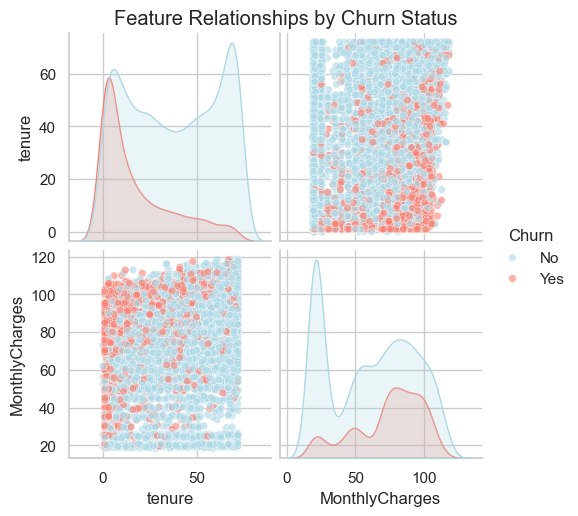

In [12]:
# 3. Dynamic Pair Plots
print("\nPairwise Relationships")

plot_features = [col for col in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] 
                if col in df.columns]

if len(plot_features) > 1: 
    sns.pairplot(df[plot_features], hue='Churn',
                diag_kind='kde',
                plot_kws={'alpha': 0.6, 's': 30},
                palette={'Yes': 'salmon', 'No': 'lightblue'})
    plt.suptitle('Feature Relationships by Churn Status', y=1.02)
    plt.show()
else:
    print("Not enough numerical features for pairplot")

In [13]:
# First convert columns to numeric (if they're strings)
df[['MonthlyCharges', 'TotalCharges']] = df[['MonthlyCharges', 'TotalCharges']].apply(pd.to_numeric, errors='coerce')

In [14]:
Q1 = df[['MonthlyCharges', 'TotalCharges']].quantile(0.25)
Q3 = df[['MonthlyCharges', 'TotalCharges']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['MonthlyCharges', 'TotalCharges']] < (Q1 - 1.5 * IQR)) | 
           (df[['MonthlyCharges', 'TotalCharges']] > (Q3 + 1.5 * IQR))).any(axis=1)

print(f"Outliers detected: {outliers.sum()}")

Outliers detected: 0


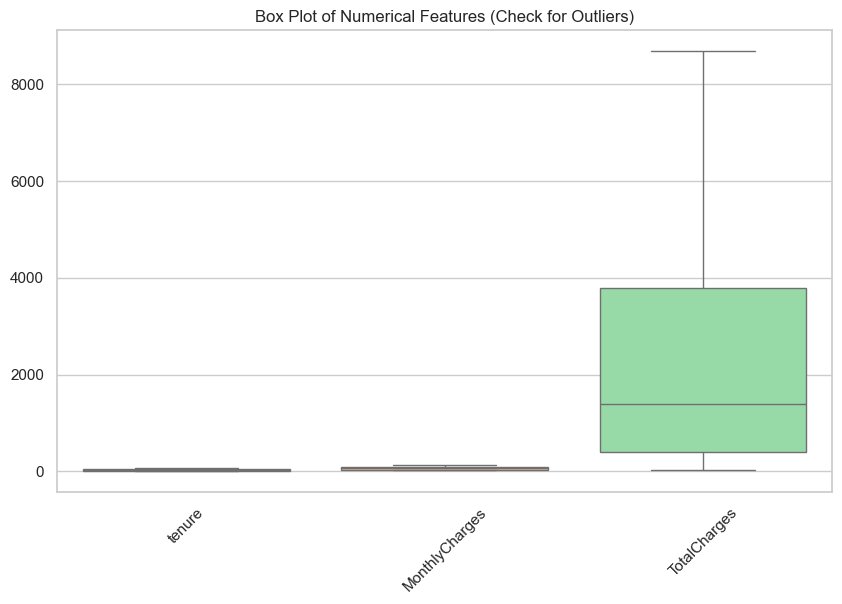

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Box Plot of Numerical Features (Check for Outliers)")
plt.xticks(rotation=45)
plt.show()

In [24]:
# Missing value analysis
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 
                          'Percentage (%)': missing_percent})
missing_df = missing_df[missing_df['Missing Count'] > 0]

if not missing_df.empty:
    print("Missing values found:")
    display(missing_df)
    
    fig = px.bar(missing_df, x=missing_df.index, y='Percentage (%)',
                 title='Percentage of Missing Values by Feature',
                 text='Missing Count',
                 width=800, height=500)
    fig.update_traces(texttemplate='%{text}', textposition='outside')
    fig.show()
else:
    print("No missing values found in the dataset.")

Missing values found:


,Missing Count,Percentage (%)
TotalCharges,11,0.156


In [16]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [17]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    "Missing Count": missing,
    "Percentage (%)": missing_percent
}).query("`Missing Count` > 0")

if not missing_df.empty:
    print("Missing values still present:")
    display(missing_df)
else:
    print(" No missing values left in the dataset!")

 No missing values left in the dataset!


In [18]:
total_duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {total_duplicates}")

if total_duplicates > 0:
    print("\nAll duplicate rows:")
    display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))
else:
    print(" No duplicate rows found!")

Total duplicate rows: 0
 No duplicate rows found!


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import boxcox, skew

def preprocess_churn_data(df):
    print("STARTING PREPROCESSING PIPELINE\n")
    df_clean = df.copy()
    
    # ==== STEP 0: Data Cleaning ====
    print("STEP 0: Data Cleaning - Before:", df_clean.shape)
    # Convert TotalCharges safely
    if 'TotalCharges' in df_clean.columns:
        print("Processing TotalCharges...")
        tc_series = df_clean['TotalCharges'].astype(str).str.strip()
        tc_series = tc_series.replace('', np.nan)
        df_clean['TotalCharges'] = pd.to_numeric(tc_series, errors='coerce')
        median_val = df_clean['TotalCharges'].median()
        df_clean['TotalCharges'] = df_clean['TotalCharges'].fillna(median_val)
        print(f"Imputed {df_clean['TotalCharges'].isna().sum()} missing values")
    print("After cleaning:", df_clean.shape, "\n")

    # ==== STEP 1: Target Encoding ====
    print("STEP 1: Target Variable Conversion")
    if 'Churn' in df_clean.columns:
        df_clean['Churn'] = (
            df_clean['Churn']
            .astype(str).str.strip()
            .map({'Yes': 1, 'No': 0})
            .astype('int8')
        )
        print("Churn distribution:")
        print(df_clean['Churn'].value_counts().to_markdown())
    else:
        print("Warning: 'Churn' column not found!")
    print()

    # ==== STEP 2: Categorical Encoding ====
    print("STEP 2: Categorical Encoding - Before:", df_clean.shape)
    binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
    binary_mapping = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
    
    encoded_cols = []
    for col in binary_cols:
        if col in df_clean.columns:
            print(f"Encoding {col}...")
            df_clean[col] = (
                df_clean[col]
                .astype(str).str.strip()
                .replace(binary_mapping)
                .astype('int8')
            )
            encoded_cols.append(col)
    print(f"Binary encoded: {encoded_cols}")

    # One-Hot Encoding
    cat_cols = ['InternetService', 'Contract', 'PaymentMethod']
    cat_cols = [col for col in cat_cols if col in df_clean.columns]
    
    if cat_cols:
        print(f"One-hot encoding: {cat_cols}")
        encoder = OneHotEncoder(drop='first', sparse_output=False)
        encoded_data = encoder.fit_transform(df_clean[cat_cols])
        encoded_df = pd.DataFrame(
            encoded_data,
            columns=encoder.get_feature_names_out(),
            index=df_clean.index
        ).astype('uint8')
        df_clean = pd.concat([df_clean.drop(cat_cols, axis=1), encoded_df], axis=1)
    print("After encoding:", df_clean.shape, "\n")

    # ==== STEP 3: Numerical Processing ====
    print("STEP 3: Numerical Features - Before:", df_clean.shape)
    num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    num_cols = [col for col in num_cols if col in df_clean.columns]
    
    if num_cols:
        print("\n=== Handling Skewness ===")
        
        # Right-skewed: TotalCharges → Box-Cox transform
        if 'TotalCharges' in df_clean.columns:
            df_clean['TotalCharges_boxcox'], _ = boxcox(df_clean['TotalCharges'] + 1)
            print(f"Applied Box-Cox to TotalCharges | New skew: {skew(df_clean['TotalCharges_boxcox']):.2f}")
        
        # Left-skewed: tenure → Cube root transform
        if 'tenure' in df_clean.columns:
            df_clean['tenure_cbrt'] = np.cbrt(df_clean['tenure'])
            print(f"Applied cube root to tenure | New skew: {skew(df_clean['tenure_cbrt']):.2f}")

        # Symmetric: MonthlyCharges → No transformation
        print(f"MonthlyCharges skew: {skew(df_clean['MonthlyCharges']):.2f} (No transformation needed)")
        
        # Columns to scale
        cols_to_scale = []
        if 'TotalCharges_boxcox' in df_clean.columns:
            cols_to_scale.append('TotalCharges_boxcox')
        if 'tenure_cbrt' in df_clean.columns:
            cols_to_scale.append('tenure_cbrt')
        if 'MonthlyCharges' in df_clean.columns:
            cols_to_scale.append('MonthlyCharges')
        
        print("\n=== Scaling Features ===")
        print("Columns being scaled:", cols_to_scale)
        
        scaler = StandardScaler()
        df_clean[cols_to_scale] = scaler.fit_transform(df_clean[cols_to_scale])
        df_clean[cols_to_scale] = df_clean[cols_to_scale].astype('float32')
        
        # Drop original columns
        cols_to_drop = [col for col in ['tenure', 'TotalCharges'] if col in df_clean.columns]
        if cols_to_drop:
            df_clean.drop(cols_to_drop, axis=1, inplace=True)
            print("\nDropped original skewed columns:", cols_to_drop)
        
        print("\n=== Post-Transformation Stats ===")
        print("Skewness values:")
        for col in cols_to_scale:
            print(f"- {col}: {skew(df_clean[col]):.2f}")
        
        print("\nScaled features summary:")
        print(df_clean[cols_to_scale].describe().to_markdown())
        
    else:
        print("Warning: No numerical columns found!")
    print()

    # ==== STEP 4: Feature Engineering ====
    print("STEP 4: Feature Engineering - Before:", df_clean.shape)
    services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
               'TechSupport', 'StreamingTV', 'StreamingMovies']
    services = [col for col in services if col in df_clean.columns]
    
    if services:
        print(f"Processing services: {services}")
        for service in services:
            df_clean[service] = (
                df_clean[service]
                .astype(str).str.strip()
                .replace({'Yes': 1, 'No': 0, 'No internet service': 0})
                .astype('uint8')
            )
        df_clean['TotalServices'] = df_clean[services].sum(axis=1).astype('uint8')
        print("TotalServices distribution:")
        print(df_clean['TotalServices'].value_counts().to_markdown())
    
    if 'TechSupport' in df_clean.columns and 'DeviceProtection' in df_clean.columns:
        df_clean['HasPremiumSupport'] = (
            (df_clean['TechSupport'] == 1) & 
            (df_clean['DeviceProtection'] == 1)
        ).astype('uint8')
        print("PremiumSupport stats:")
        print(df_clean['HasPremiumSupport'].value_counts().to_markdown())
    
    if 'TotalCharges_boxcox' in df_clean.columns and 'tenure_cbrt' in df_clean.columns:
        df_clean['AvgMonthlySpend'] = (
            np.expm1(df_clean['TotalCharges_boxcox']) / (df_clean['tenure_cbrt']**3 + 1)
        ).astype('float32')
        print("AvgMonthlySpend summary:")
        print(df_clean['AvgMonthlySpend'].describe().to_markdown())
    print("After engineering:", df_clean.shape, "\n")

    # ==== STEP 5: Final Cleanup ====
    print("STEP 5: Final Cleanup - Before:", df_clean.shape)
    cols_to_drop = ['customerID', 'MultipleLines'] + services
    cols_to_drop = [col for col in cols_to_drop if col in df_clean.columns]
    
    if cols_to_drop:
        print(f"Dropping columns: {cols_to_drop}")
        df_clean = df_clean.drop(cols_to_drop, axis=1)
    
    # Ensure target is last column
    if 'Churn' in df_clean.columns:
        df_clean = df_clean[[c for c in df_clean.columns if c != 'Churn'] + ['Churn']]
    
    print("\nPREPROCESSING COMPLETE!")
    print(f"Final shape: {df_clean.shape}")
    print("Sample of processed data:")
    display(df_clean.head(3))
    print("\nMemory usage:", df_clean.memory_usage(deep=True).sum() / 1024**2, "MB")
    
    return df_clean, scaler, encoder if 'encoder' in locals() else None

# Execute preprocessing
preprocessed_df, scaler, encoder = preprocess_churn_data(df)

STARTING PREPROCESSING PIPELINE

STEP 0: Data Cleaning - Before: (7043, 21)
Processing TotalCharges...
Imputed 0 missing values
After cleaning: (7043, 21) 

STEP 1: Target Variable Conversion
Churn distribution:
|   Churn |   count |
|--------:|--------:|
|       0 |    5174 |
|       1 |    1869 |

STEP 2: Categorical Encoding - Before: (7043, 21)
Encoding gender...
Encoding Partner...
Encoding Dependents...
Encoding PhoneService...
Encoding PaperlessBilling...
Binary encoded: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
One-hot encoding: ['InternetService', 'Contract', 'PaymentMethod']
After encoding: (7043, 25) 

STEP 3: Numerical Features - Before: (7043, 25)

=== Handling Skewness ===
Applied Box-Cox to TotalCharges | New skew: -0.14
Applied cube root to tenure | New skew: -0.46
MonthlyCharges skew: -0.22 (No transformation needed)

=== Scaling Features ===
Columns being scaled: ['TotalCharges_boxcox', 'tenure_cbrt', 'MonthlyCharges']

Dropped original s

C:\Users\Ahmed Ismail\AppData\Local\Temp\ipykernel_14152\2896661727.py:50: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\Ahmed Ismail\AppData\Local\Temp\ipykernel_14152\2896661727.py:50: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\Ahmed Ismail\AppData\Local\Temp\ipykernel_14152\2896661727.py:50: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, 

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges_boxcox,tenure_cbrt,TotalServices,HasPremiumSupport,AvgMonthlySpend,Churn
0,0,0,1,0,0,1,-1.160,0,0,0,0,0,1,0,-1.811,-1.812,1,0,0.169,0
1,1,0,0,0,1,0,-0.260,0,0,1,0,0,0,1,0.254,0.356,2,0,0.277,0
2,1,0,0,0,1,1,-0.363,0,0,0,0,0,0,1,-1.387,-1.561,2,0,0.268,1



Memory usage: 0.26207828521728516 MB



Final Skewness Verification:
TotalCharges_boxcox: -0.14430657
tenure_cbrt: -0.45955428
MonthlyCharges: -0.22047746


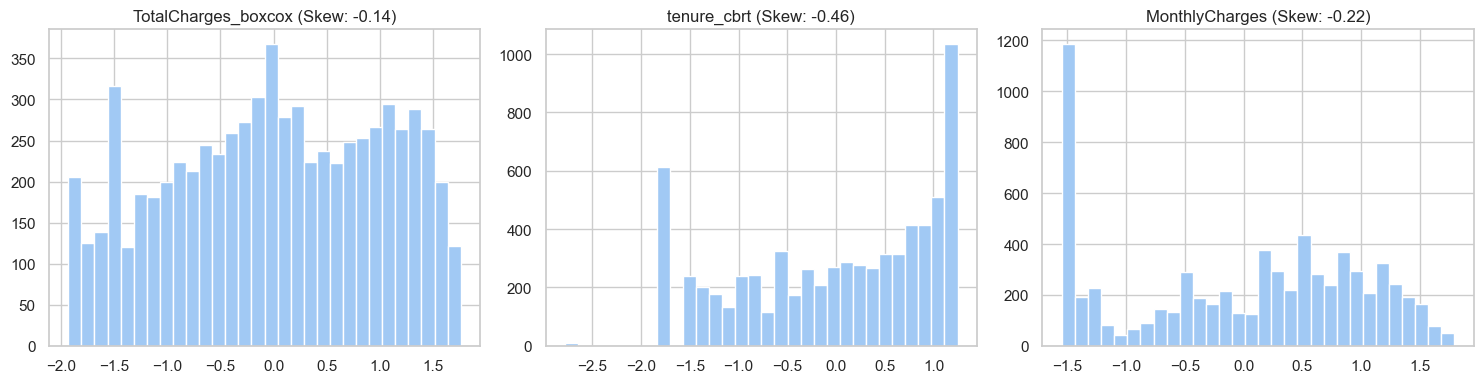

In [20]:
# Check final skewness
print("\nFinal Skewness Verification:")
print("TotalCharges_boxcox:", skew(preprocessed_df['TotalCharges_boxcox']))
print("tenure_cbrt:", skew(preprocessed_df['tenure_cbrt']))
print("MonthlyCharges:", skew(preprocessed_df['MonthlyCharges']))

# Visual confirmation
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
features = ['TotalCharges_boxcox', 'tenure_cbrt', 'MonthlyCharges']
for i, col in enumerate(features):
    plt.subplot(1,3,i+1)
    plt.hist(preprocessed_df[col], bins=30)
    plt.title(f"{col} (Skew: {skew(preprocessed_df[col]):.2f})")
plt.tight_layout()
plt.show()

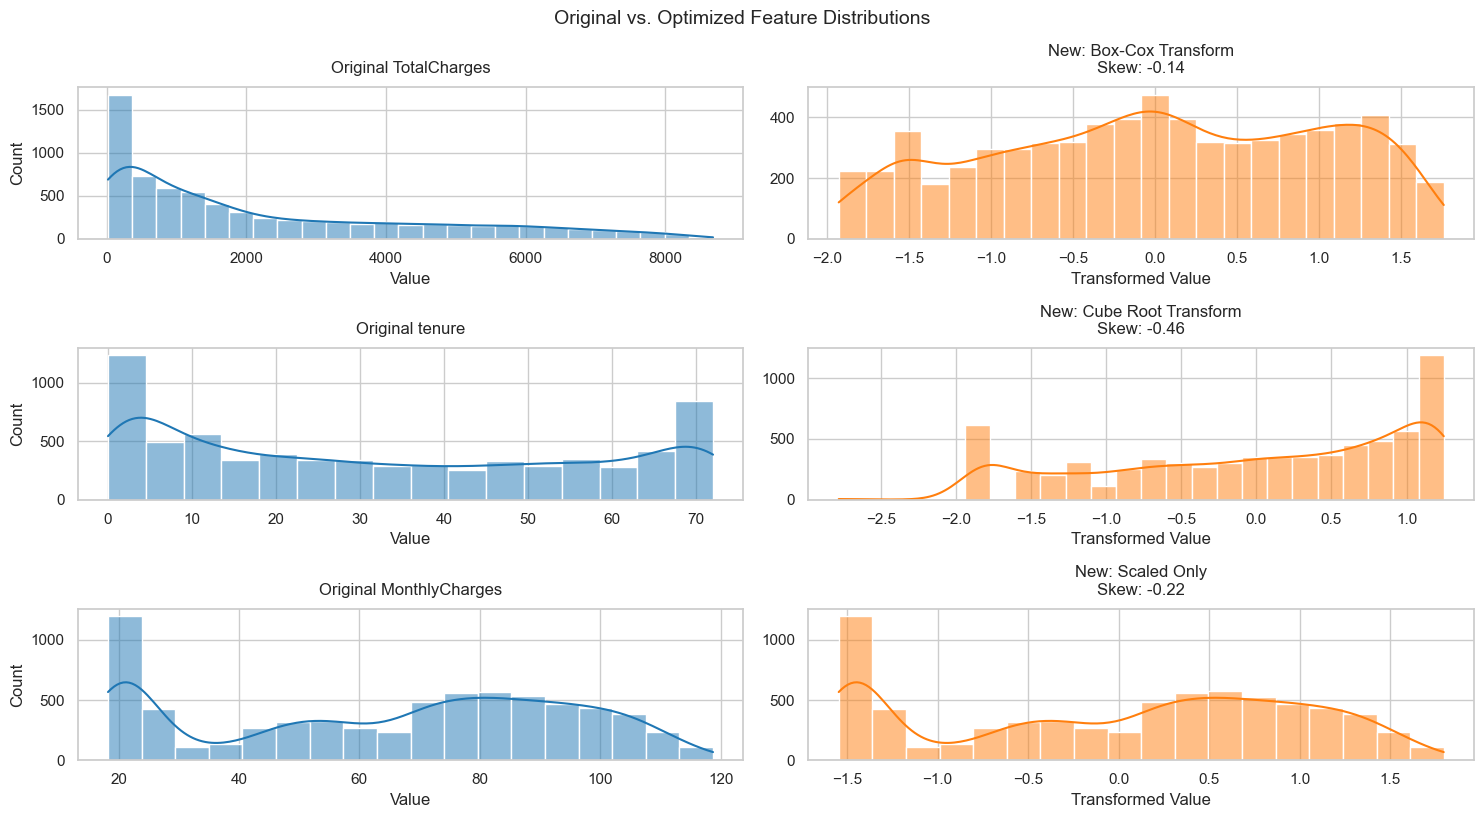

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

# Create subplots: 3 rows (features) x 2 columns (original vs new)
features = [
    ('TotalCharges', 'TotalCharges_boxcox', 'Box-Cox Transform'),
    ('tenure', 'tenure_cbrt', 'Cube Root Transform'), 
    ('MonthlyCharges', 'MonthlyCharges', 'Scaled Only')
]

for i, (orig_col, new_col, transform_name) in enumerate(features, 1):
    # Original Distribution
    plt.subplot(3, 2, 2*i-1)
    sns.histplot(df[orig_col], kde=True, color='#1f77b4')
    plt.title(f'Original {orig_col}', pad=10)
    plt.xlabel('Value')
    plt.ylabel('Count')
    
    # New Transformation
    plt.subplot(3, 2, 2*i)
    sns.histplot(preprocessed_df[new_col], kde=True, color='#ff7f0e')
    plt.title(f'New: {transform_name}\nSkew: {skew(preprocessed_df[new_col]):.2f}', pad=10)
    plt.xlabel('Transformed Value')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Original vs. Optimized Feature Distributions', y=1.02, fontsize=14)
plt.show()

In [22]:
print("Final columns:", preprocessed_df.columns.tolist())

Final columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'TotalCharges_boxcox', 'tenure_cbrt', 'TotalServices', 'HasPremiumSupport', 'AvgMonthlySpend', 'Churn']


In [23]:
X = preprocessed_df.drop('Churn', axis=1)  # All features except target
y = preprocessed_df['Churn']    
print(f"Original feature count: {X.shape[1]}")

Original feature count: 19


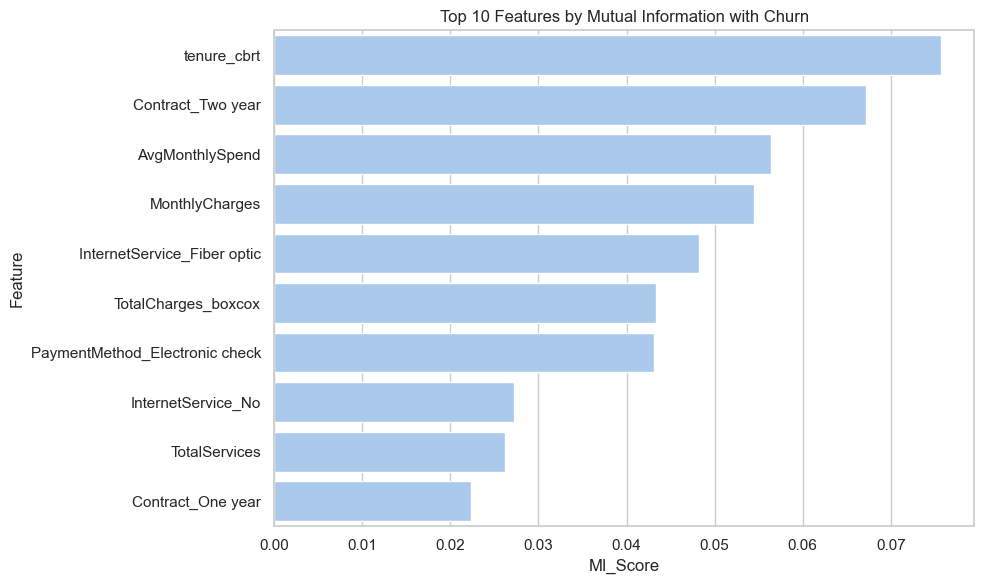

In [24]:
# 2. Feature Analysis (Example: Mutual Information)
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y, random_state=42)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores}) \
       .sort_values('MI_Score', ascending=False)

# 3. Visualize Top Features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='MI_Score', y='Feature', data=mi_df.head(10))
plt.title("Top 10 Features by Mutual Information with Churn")
plt.tight_layout()
plt.show()

In [25]:
# Check current columns
print("Current features:\n", preprocessed_df.columns.tolist())

# Verify no original skewed columns remain
assert 'tenure' not in preprocessed_df.columns
assert 'TotalCharges' not in preprocessed_df.columns

# Check new features
print("\nNew feature distributions:")
print(preprocessed_df[['TotalServices', 'HasPremiumSupport']].describe())

Current features:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'TotalCharges_boxcox', 'tenure_cbrt', 'TotalServices', 'HasPremiumSupport', 'AvgMonthlySpend', 'Churn']

New feature distributions:
       TotalServices  HasPremiumSupport
count       7043.000           7043.000
mean           2.038              0.172
std            1.848              0.377
min            0.000              0.000
25%            0.000              0.000
50%            2.000              0.000
75%            3.000              0.000
max            6.000              1.000


In [26]:
preprocessed_churn_data = preprocessed_df.copy()
preprocessed_churn_data.to_csv('preprocessed_churn_data.csv', index=False, encoding='utf-8')
print("\n Preprocessed data saved as:")
print("- File: preprocessed_churn_data.csv")


 Preprocessed data saved as:
- File: preprocessed_churn_data.csv
